In [210]:
# Import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics
from scipy import stats


In [246]:
# Import data and preprocessing
df = pd.read_csv("files/Case_PRB.csv")
df = df.fillna(0)

country_mask = (df['location'] == "Italy")
df = df[country_mask]

total_cases = df[['total_cases']]
new_cases = df[['new_cases']]

[]

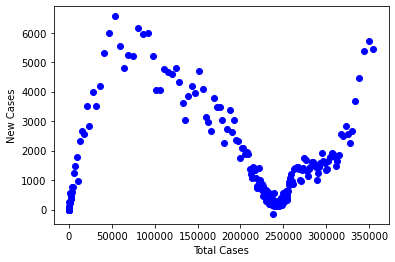

In [247]:
# Plotting the information
plt.scatter(total_cases, new_cases, color="blue")
plt.xlabel('Total Cases')
plt.ylabel('New Cases')
plt.plot()

In [215]:
# Data preprocess stront door python klote
total_cases = total_cases['total_deaths'].to_numpy()
new_cases = new_cases['new_cases'].to_numpy()

slope, intercept, r_value, p_value, std_err = stats.linregress(total_cases, new_cases)

In [216]:
# Accuracy of the line
r_value ** 20000

0.0

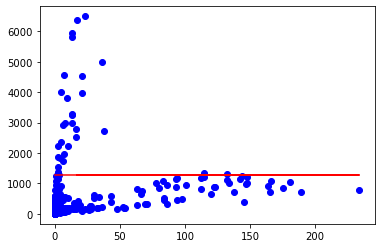

In [225]:
# Prediction
def predict(x):
  return slope * x + intercept

fitLine = predict(total_cases)

fig = plt.scatter(total_cases, new_cases, color="blue")
plt.plot(total_cases, fitLine, c='r')
plt.show()

##### Reflect on using linear regression model to predict growth of new cases

I notice the new_cases are increasing non-linearly (_see grapgh above_), for that reason the linear regression is not able to capture such nonlnear trend. Below I want to expreiment with using the decision tree model to solve this regression problem. 

##### Decision Tree Model

In [2]:
X = df[['total_deaths']]
y = df[['new_cases']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

dt = DecisionTreeRegressor(max_depth=3, random_state = 1)

dt.fit(X_train, y_train)
# predict label
y_prediction = dt.predict(X_test)
# Validate the mean sqaure error
mse_dt = MSE(y_test, y_prediction)

rmse_dt = mse_dt**(1/2)

print(y_prediction, len(y_prediction))
print(X_test, len(y_prediction))
plt.scatter(X_test, y_test, edgecolor="black", c="darkorange", label="new cases")
plt.plot(X_test, y_prediction, color="yellowgreen")
plt.xlabel("total deaths")
plt.ylabel("new cases")


NameError: name 'df' is not defined